# To recap:

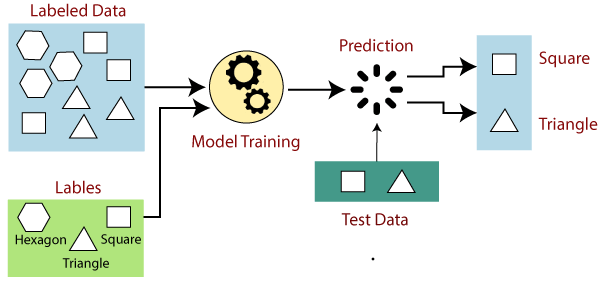

# k-nearest neighbors (KNN):

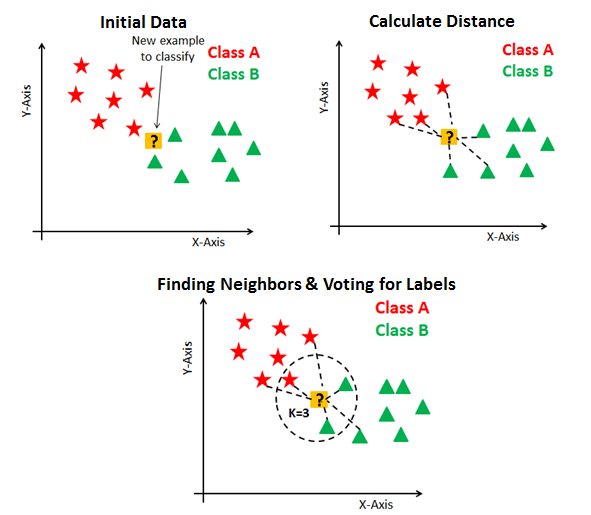

# Dataset

In [ ]:
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.shape

(891, 15)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]

In [ ]:
titanic.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
titanic.dropna(axis=0, inplace=True)

In [ ]:
titanic.shape

(714, 4)

In [ ]:
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [ ]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [ ]:
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


# Model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5 )

In [ ]:
X_train.shape

(571, 3)

In [ ]:
X_test.shape

(143, 3)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
model.score(X_test, y_test)

0.6923076923076923

In [ ]:
for k in range(2, 10):
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    
    print('test score for k=', k,' ', model.score(X_test, y_test))

test score for k= 2   0.7482517482517482
test score for k= 3   0.7552447552447552
test score for k= 4   0.7202797202797203
test score for k= 5   0.6923076923076923
test score for k= 6   0.6993006993006993
test score for k= 7   0.7132867132867133
test score for k= 8   0.7272727272727273
test score for k= 9   0.7272727272727273


# Prediction:

In [ ]:
import numpy as np

In [ ]:
def survive(model, pclass=3, sex=1, age=25):
    x = np.array([pclass, sex, age]).reshape(1, 3)

    print(model.predict(x), model.predict_proba(x))


In [ ]:
survive(model, 1, 1, 12)

[1] [[0.33333333 0.66666667]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
